In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
#Checkpoint 1 

In [156]:
#Reading csv and txt files of rounds2 and companies
companies = pd.read_csv("/Users/papiyadas/Downloads/Assignment1/companies.txt", delimiter="\t", encoding='iso-8859-1')
rounds2 = pd.read_csv("/Users/papiyadas/Downloads/Assignment1/rounds2.csv", encoding='iso-8859-1')

In [157]:
#Data cleaning
companies.permalink = companies.permalink.str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.lower()
companies.name = companies.name.str.lower()

In [158]:
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funding_round_code        72.910000
funded_at                  0.000000
raised_amount_usd         17.390000
dtype: float64

In [159]:
rounds2.funding_round_code = rounds2.funding_round_code.fillna("NA")

In [160]:
rounds2.raised_amount_usd = rounds2.raised_amount_usd.fillna(0)

In [161]:
rounds2.raised_amount_usd

0        10000000.000000
1               0.000000
2          700000.000000
3         3406878.000000
4         2000000.000000
               ...      
114944      41313.000000
114945      32842.000000
114946          0.000000
114947      18192.000000
114948      14851.000000
Name: raised_amount_usd, Length: 114949, dtype: float64

In [162]:
round(100*(companies.isnull().sum()/len(companies.index)),2)

permalink        0.000000
name             0.000000
homepage_url     7.620000
category_list    4.740000
status           0.000000
country_code    10.480000
state_code      12.880000
region          12.100000
city            12.100000
founded_at      22.930000
dtype: float64

In [163]:
companies = companies.fillna("NA")

In [164]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NA
66364,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ãeron,http://www.aeron.hu/,NA,operating,NA,NA,NA,NA,01-01-2011
66366,/organization/ãasys-2,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [165]:
#Getting Unique Companies from rounds2

#rounds2 company unique
rounds2.company_permalink.unique().shape


(66370,)

In [166]:
#companies company unique
companies.permalink.unique().shape

(66368,)

In [167]:
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how='inner')

In [168]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.000000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NA,01-03-2014,700000.000000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000000,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NA,01-03-2014,41313.000000,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NA,01-05-2013,32842.000000,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,0.000000,/organization/ãeron,ãeron,http://www.aeron.hu/,NA,operating,NA,NA,NA,NA,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NA,01-01-2015,18192.000000,/organization/ãasys-2,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [169]:
master_frame.shape

(114942, 16)

In [170]:
#Checkpoint 2

In [171]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink         0.000000
funding_round_permalink   0.000000
funding_round_type        0.000000
funding_round_code        0.000000
funded_at                 0.000000
raised_amount_usd         0.000000
permalink                 0.000000
name                      0.000000
homepage_url              0.000000
category_list             0.000000
status                    0.000000
country_code              0.000000
state_code                0.000000
region                    0.000000
city                      0.000000
founded_at                0.000000
dtype: float64

In [172]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [173]:
pd.set_option('float_format', '{:f}'.format)

In [174]:
master_funding_groups = master_frame.groupby("funding_round_type")

In [175]:
master_funding_group_agg = master_funding_groups.agg({"raised_amount_usd" : ['mean']})

In [177]:
master_funding_group_agg

,raised_amount_usd
,mean
funding_round_type,
angel,764564.345750
convertible_note,1157471.421024
debt_financing,16517018.257578
equity_crowdfunding,202983.163340
grant,4152010.975000
non_equity_assistance,157161.376963
post_ipo_debt,168704571.822368
post_ipo_equity,80894367.007837


In [178]:
#Checkpoint 3

In [179]:
venture_group = master_funding_groups.get_group("venture")

In [180]:
venture_group

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.000000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000000,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NA,24-07-2014,0.000000,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NA,18-10-2012,140500.000000,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NA
114929,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.000000,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NA
114930,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.000000,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114934,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.000000,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NA


In [182]:
venture_group.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA   422510842796.000000
CHN    39835418773.000000
NA     25506108414.000000
GBR    20245627416.000000
IND    14391858718.000000
CAN     9583332317.000000
FRA     7259536732.000000
ISR     6907514579.000000
DEU     6346959822.000000
JPN     3363676611.000000
SWE     3254952563.000000
NLD     2939403619.000000
CHE     2827560264.000000
SGP     2793917856.000000
ESP     1835831452.000000
Name: raised_amount_usd, dtype: float64

In [321]:
top9 = venture_group[venture_group['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9 = top9.groupby('country_code').agg({"raised_amount_usd":['sum']})
top9 = pd.DataFrame(top9.to_records())
top9.columns = ['country_code','raised_amount_usd_sum']
top9 = top9.sort_values(by="raised_amount_usd_sum",ascending=False)

In [322]:
#Top 9 countries with highest investment
top9

,country_code,raised_amount_usd_sum
8,USA,422510842796.000000
1,CHN,39835418773.000000
4,GBR,20245627416.000000
5,IND,14391858718.000000
0,CAN,9583332317.000000
3,FRA,7259536732.000000
6,ISR,6907514579.000000
2,DEU,6346959822.000000
7,JPN,3363676611.000000


In [184]:
#Checkpoint 4

In [185]:
master_frame.category_list = master_frame.category_list.fillna("NA")

In [186]:
def extract_primary_sector(s):
    
    primary_sector = "" #primary sector
    
    category_list = s['category_list']
    
    try:
        primary_sector_list = category_list.split("|")
        primary_sector = primary_sector_list[0]
    except:
        print("Exception")
    
    s["primary_sector"] = primary_sector
    
    return s

In [187]:
master_frame = master_frame.apply(extract_primary_sector,axis=1)

In [188]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.000000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NA,01-03-2014,700000.000000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000000,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NA,01-03-2014,41313.000000,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NA,01-05-2013,32842.000000,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,0.000000,/organization/ãeron,ãeron,http://www.aeron.hu/,NA,operating,NA,NA,NA,NA,01-01-2011,NA
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NA,01-01-2015,18192.000000,/organization/ãasys-2,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,Consumer Electronics


In [189]:
# sector mapping 

In [195]:
mapping = pd.read_csv("/Users/papiyadas/Downloads/Assignment1/mapping.csv", encoding='iso-8859-1')

In [196]:
round(100*(mapping.isnull().sum()/len(mapping.index)),2)

category_list                             0.150000
Automotive & Sports                       0.000000
Blanks                                    0.000000
Cleantech / Semiconductors                0.000000
Entertainment                             0.000000
Health                                    0.000000
Manufacturing                             0.000000
News, Search and Messaging                0.000000
Others                                    0.000000
Social, Finance, Analytics, Advertising   0.000000
dtype: float64

In [201]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [203]:
mapping = mapping.dropna()

In [204]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [205]:
mapping = mapping.melt(id_vars="category_list",var_name="main_sector")
mapping = mapping.loc[~(mapping["value"] == 0)]
mapping = mapping.drop(columns="value")

In [207]:
mapping.category_list.sort_values(ascending=True)

1844                 0notechnology
1845    0tural Language Processing
1846              0tural Resources
4595                     0vigation
3435                            3D
                   ...            
5495                  Young Adults
5193                           iOS
5194                          iPad
5195                        iPhone
3188                       mHealth
Name: category_list, Length: 687, dtype: object

In [208]:
import re
#replace '0' from string to 'na'
mapping['category_list'] = mapping.category_list.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [210]:
mapping.category_list.sort_values(ascending=False)

4595                     navigation
1846              natural Resources
1845    natural Language Processing
1844                 nanotechnology
3188                        mHealth
                   ...             
2752               Active Lifestyle
5499                     Accounting
3437                  3D Technology
3436                    3D Printing
3435                             3D
Name: category_list, Length: 687, dtype: object

In [211]:
master_frame = pd.merge(master_frame, mapping, left_on='primary_sector', right_on='category_list', how='inner', 
                          suffixes=('','_new')
                         )

In [213]:
master_frame = master_frame.drop(['category_list_new'], axis=1)

In [214]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'primary_sector',
       'main_sector'],
      dtype='object')

In [215]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NA,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NA,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NA,26-03-2014,18000000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/a-b-productions,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NA,21-01-2014,0.000000,/organization/a-b-productions,a.b productions,NA,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111137,/organization/wing-ma-am,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,NA,09-06-2013,25000.000000,/organization/wing-ma-am,wing ma'am,http://www.wingmaam.com/,Gay & Lesbian,operating,USA,PA,Pittsburgh,Pittsburgh,07-10-2012,Gay & Lesbian,Others
111138,/organization/wiselike,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,NA,31-08-2015,1250000.000000,/organization/wiselike,wiselike,https://wiselike.com/,Q&A,operating,USA,CA,SF Bay Area,San Francisco,NA,Q&A,"News, Search and Messaging"
111139,/organization/yes-no,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,NA,01-05-2015,1000000.000000,/organization/yes-no,yes.no,http://yes.no,Q&A|Social Network Media,closed,ISR,5,Tel Aviv,Tel Aviv,01-01-2015,Q&A,"News, Search and Messaging"
111140,/organization/youcruit,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,NA,06-02-2014,447037.000000,/organization/youcruit,youcruit,http://www.youcruit.com,Micro-Enterprises|Recruiting|Small and Medium ...,operating,SWE,27,Malmo,MalmÃ¶,01-01-2012,Micro-Enterprises,Others


In [216]:
#Checkpoint 5

In [217]:
country_by_groups = master_frame.groupby("country_code")

In [218]:
def count_amount(s):
    
    s["total_inv_count"] = 1
    s["total_inv_amount"] = s["raised_amount_usd"]
    return s

In [219]:
#Country 1 Dataframe #USA
D1 = country_by_groups.get_group("USA")
D1 = D1[D1.raised_amount_usd.between(5000000, 15000000)]
D1 = D1[D1.funding_round_type == "venture"]
D1 = D1.apply(count_amount,axis = 1)

In [220]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
10,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NA,Media,Entertainment,1,5000000.000000
43,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.000000,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,1,5000000.000000
98,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.000000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,1,5000000.000000
99,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.000000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,1,5000000.000000
134,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.000000,/organization/matchmine,matchmine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,1,10000000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111067,/organization/patientkeeper,/funding-round/fbb1d901e528ff7ef962be26f4e6218d,venture,NA,22-06-2012,6250000.000000,/organization/patientkeeper,patientkeeper,http://www.patientkeeper.com,Physicians|Software,acquired,USA,MA,Boston,Waltham,16-11-1996,Physicians,Health,1,6250000.000000
111083,/organization/rxwiki,/funding-round/19e4ff01d335541ea5162bea925000a3,venture,A,16-10-2015,5745869.000000,/organization/rxwiki,"rxwiki, inc.",http://www.rxwiki.com,Independent Pharmacies|Mobile Health|Pharmaceu...,operating,USA,TX,Austin,Austin,01-03-2012,Independent Pharmacies,Health,1,5745869.000000
111084,/organization/tikvah-therapeutics,/funding-round/7e3470deff6fd5d7233113977e2eebf2,venture,NA,14-07-2007,10000000.000000,/organization/tikvah-therapeutics,tikvah therapeutics,NA,Independent Pharmacies|Neuroscience,operating,USA,GA,Atlanta,Atlanta,NA,Independent Pharmacies,Health,1,10000000.000000
111125,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.000000,/organization/thisnext,thisnext,http://www.thisnext.com,Social Buying|Social Media,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,Social Buying,"Social, Finance, Analytics, Advertising",1,5000000.000000


In [221]:
#Total amount of investment (sum)
D1.agg({"total_inv_amount":['sum']})

,total_inv_amount
sum,107318294664.000000


In [223]:
#Total number of investment (count)
D1.agg({"total_inv_count":['count']})

,total_inv_count
count,12012


In [255]:
sector_by = D1.groupby("main_sector")
sector_by_agg = sector_by.agg({"total_inv_amount":['sum','count']})
sector_by_agg = pd.DataFrame(sector_by_agg.to_records())
sector_by_agg.columns = ["main_sector","total_inv_amount_sum","total_inv_amount_count"]
sector_by_agg = sector_by_agg.sort_values(by="total_inv_amount_count",ascending=False)

In [256]:
sector_by_agg

,main_sector,total_inv_amount_sum,total_inv_amount_count
6,Others,26321007002.000000,2950
7,"Social, Finance, Analytics, Advertising",23807376964.000000,2714
1,Cleantech / Semiconductors,21206628192.000000,2300
5,"News, Search and Messaging",13959567428.000000,1582
3,Health,8211859357.000000,909
4,Manufacturing,7258553378.000000,799
2,Entertainment,5099197982.000000,591
0,Automotive & Sports,1454104361.000000,167


In [227]:
sector_by.get_group("Others").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
54900,/organization/total-attorneys,/funding-round/c40a174d02cd462864bb04e63e7f86a2,venture,A,02-05-2012,15000000.000000,/organization/total-attorneys,total attorneys,http://www.totalattorneys.com,Enterprise Software,operating,USA,IL,Chicago,Chicago,01-01-2002,Enterprise Software,Others,1,15000000.000000
12820,/organization/toutapp,/funding-round/7aec18a54dc587993656c10a8d2972b6,venture,B,03-03-2015,15000000.000000,/organization/toutapp,toutapp,http://toutapp.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011,Software,Others,1,15000000.000000
54725,/organization/stem,/funding-round/e400f5d9b32f4873a8ee9c990d68ebb8,venture,B,02-12-2013,15000000.000000,/organization/stem,stem,http://www.stem.com,Enterprise Software,operating,USA,CA,SF Bay Area,Millbrae,01-01-2009,Enterprise Software,Others,1,15000000.000000
13134,/organization/vieo,/funding-round/6284f9c9b953ac1054fca1ef675b93e4,venture,A,31-01-2005,15000000.000000,/organization/vieo,vieo,NA,Software,operating,USA,TX,Austin,Austin,NA,Software,Others,1,15000000.000000
13121,/organization/vicarious-systems-inc,/funding-round/a6a4ae16d1e1a6048bd65243ceb0d62f,venture,A,21-08-2012,15000000.000000,/organization/vicarious-systems-inc,vicarious,http://vicarious.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2010,Software,Others,1,15000000.000000
96173,/organization/apreso-classroom,/funding-round/57f51f32a8b50176fc5f975b5535683b,venture,B,14-10-2008,15000000.000000,/organization/apreso-classroom,apreso classroom,http://www.apreso.com/ac_product_overview.asp,All Students|EdTech|Education,closed,USA,VA,"Washington, D.C.",Dulles,NA,All Students,Others,1,15000000.000000
13109,/organization/vettro,/funding-round/a53ac736497081bef49d19ffd1b2a788,venture,D,01-03-2007,15000000.000000,/organization/vettro,vettro,http://www.vettro.com,Software,acquired,USA,NY,New York City,New York,01-01-1999,Software,Others,1,15000000.000000
54767,/organization/talari-networks,/funding-round/ee25613a26e04b3c1537e1f2a815f180,venture,D,18-11-2013,15000000.000000,/organization/talari-networks,talari networks,http://www.talari.com,Enterprise Software|Internet|Trusted Networks,operating,USA,CA,SF Bay Area,San Jose,01-01-2009,Enterprise Software,Others,1,15000000.000000
54785,/organization/taulia,/funding-round/e759884519b2dbba64db09267482f04f,venture,D,21-01-2015,15000000.000000,/organization/taulia,taulia,http://www.taulia.com,Enterprise Software|Hardware + Software|SaaS,operating,USA,CA,SF Bay Area,San Francisco,01-01-2009,Enterprise Software,Others,1,15000000.000000
13052,/organization/varmour-networks,/funding-round/526b834c11ea19601f3173c402c519e4,venture,B,14-12-2013,15000000.000000,/organization/varmour-networks,varmour,http://www.varmour.com,Software,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Software,Others,1,15000000.000000


In [229]:
sector_by.get_group("Social, Finance, Analytics, Advertising").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
62517,/organization/sigfig,/funding-round/0ec08604381dc1c98ed53fe234dcdc86,venture,B,02-07-2013,15000000.000000,/organization/sigfig,sigfig,http://www.sigfig.com,Finance,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011,Finance,"Social, Finance, Analytics, Advertising",1,15000000.000000
100239,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.000000,/organization/zynga,zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,Facebook Applications,"Social, Finance, Analytics, Advertising",1,15000000.000000
74670,/organization/stellaservice,/funding-round/910deb928673872a8e2f699df85b0525,venture,B,27-02-2013,15000000.000000,/organization/stellaservice,stellaservice,http://stellaservice.com,Customer Service|E-Commerce|Online Shopping|So...,operating,USA,NY,New York City,New York,01-01-2009,Customer Service,"Social, Finance, Analytics, Advertising",1,15000000.000000
74671,/organization/stellaservice,/funding-round/b826c903e37e572a26f88567d55b88a8,venture,C,15-07-2015,15000000.000000,/organization/stellaservice,stellaservice,http://stellaservice.com,Customer Service|E-Commerce|Online Shopping|So...,operating,USA,NY,New York City,New York,01-01-2009,Customer Service,"Social, Finance, Analytics, Advertising",1,15000000.000000
74682,/organization/talkdesk,/funding-round/69bb9b8d37c6fb942015e0054852080b,venture,A,09-06-2015,15000000.000000,/organization/talkdesk,talkdesk,http://talkdesk.com,Customer Service|Customer Support Tools|SaaS|S...,operating,USA,CA,SF Bay Area,San Francisco,10-10-2011,Customer Service,"Social, Finance, Analytics, Advertising",1,15000000.000000
101617,/organization/next-jump,/funding-round/b734fb4979ed6f6a0cec51022ef9937a,venture,NA,01-01-1999,15000000.000000,/organization/next-jump,next jump,http://www.nextjump.com,Business Development|Corporate Wellness|Discou...,operating,USA,NY,New York City,New York,01-01-1994,Business Development,"Social, Finance, Analytics, Advertising",1,15000000.000000
74699,/organization/travel-holdings,/funding-round/51d1987003745b09888212528e778148,venture,NA,21-12-2004,15000000.000000,/organization/travel-holdings,travel holdings,http://www.travelholdings.com/,Customer Service|Technology|Travel,operating,USA,FL,Orlando,Altamonte Springs,01-01-2004,Customer Service,"Social, Finance, Analytics, Advertising",1,15000000.000000
101562,/organization/again-technologies,/funding-round/b61b2ae4fc2e1427a956a25d07838405,venture,C,10-12-2001,15000000.000000,/organization/again-technologies,motiva,http://www.againtech.com,Business Development|Enterprise Software|Techn...,operating,USA,CA,SF Bay Area,San Mateo,01-01-1995,Business Development,"Social, Finance, Analytics, Advertising",1,15000000.000000
74730,/organization/yelp,/funding-round/b96e8d02325d82031a366951e73fa721,venture,D,26-02-2008,15000000.000000,/organization/yelp,yelp,http://yelp.com,Customer Service|Reviews and Recommendations|S...,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2004,Customer Service,"Social, Finance, Analytics, Advertising",1,15000000.000000
50083,/organization/millennial-media,/funding-round/b7972b9db935e7ce569582bba4a847c9,venture,B,06-11-2007,15000000.000000,/organization/millennial-media,millennial media,http://www.millennialmedia.com,Advertising|App Marketing|Brand Marketing|Mark...,acquired,USA,MD,Baltimore,Baltimore,01-05-2006,Advertising,"Social, Finance, Analytics, Advertising",1,15000000.000000


In [230]:
#Country 2 Dataframe #GBR
D2 = country_by_groups.get_group("GBR")
D2 = D2[D2.raised_amount_usd.between(5000000, 15000000)]
D2 = D2[D2.funding_round_type == "venture"]
D2 = D2.apply(count_amount,axis = 1)

In [231]:
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NA,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,1,15000000.000000
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NA,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,1,5800000.000000
368,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NA,09-07-2014,10000000.000000,/organization/common-interest-communities,common interest communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NA,Application Platforms,"News, Search and Messaging",1,10000000.000000
415,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NA,01-10-2014,5460000.000000,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging",1,5460000.000000
416,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.000000,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging",1,5400000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108709,/organization/troux-technologies,/funding-round/468111d06495683fa9db48fae9a4e38e,venture,NA,08-10-2009,10000000.000000,/organization/troux-technologies,troux technologies,http://www.troux.com,Career Planning|Enterprise Software|Software,acquired,GBR,B9,London,Slough,01-01-2001,Career Planning,"Social, Finance, Analytics, Advertising",1,10000000.000000
109174,/organization/blueheath,/funding-round/3eb3fd60aa846d24a440a6e816540c89,venture,A,17-01-2001,6686126.000000,/organization/blueheath,blueheath holdings,NA,Groceries|Leisure|Retail|Wholesale,operating,GBR,H9,London,London,NA,Groceries,Manufacturing,1,6686126.000000
110142,/organization/songkick,/funding-round/0698b9660362675cedb52b8d064857a1,venture,B,08-03-2012,10000000.000000,/organization/songkick,songkick,http://songkick.com,Concerts|Music,operating,GBR,H9,London,London,01-06-2007,Concerts,Entertainment,1,10000000.000000
110526,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,NA,21-05-2014,8425073.000000,/organization/e-leathergroup,e-leathergroup,http://www.eleathergroup.com/,Textiles,operating,GBR,K3,Peterborough,Peterborough,NA,Textiles,Others,1,8425073.000000


In [232]:
#Total amount of investment (sum)
D2.agg({"total_inv_amount":['sum']})

,total_inv_amount
sum,5365228300.000000


In [233]:
#Total number of investment (count)
D2.agg({"total_inv_count":['count']})

,total_inv_count
count,619


In [257]:
sector_by_d2 = D2.groupby("main_sector")
sector_by_agg_d2 = sector_by_d2.agg({"total_inv_amount":['sum','count']})
sector_by_agg_d2 = pd.DataFrame(sector_by_agg_d2.to_records())
sector_by_agg_d2.columns = ["main_sector","total_inv_amount_sum","total_inv_amount_count"]
sector_by_agg_d2 = sector_by_agg_d2.sort_values(by="total_inv_amount_count",ascending=False)

In [258]:
sector_by_agg_d2

,main_sector,total_inv_amount_sum,total_inv_amount_count
6,Others,1283624289.000000,147
7,"Social, Finance, Analytics, Advertising",1089404014.000000,133
1,Cleantech / Semiconductors,1150139665.000000,128
5,"News, Search and Messaging",615746235.000000,73
2,Entertainment,482784687.000000,56
4,Manufacturing,361940335.000000,42
3,Health,214537510.000000,24
0,Automotive & Sports,167051565.000000,16


In [259]:
sector_by_d2.get_group("Others").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
72030,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15000000.000000,/organization/silverrail-technologies,silverrail technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,01-04-2009,Technology,Others,1,15000000.000000
9731,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NA,12-12-2011,15000000.000000,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01-01-2000,Software,Others,1,15000000.000000
7277,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NA,16-06-2005,15000000.000000,/organization/azure-solutions,azure solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,NA,Software,Others,1,15000000.000000
8726,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.000000,/organization/environmentiq,environmentiq,NA,Software,operating,GBR,C3,London,Cambridge,01-01-1988,Software,Others,1,15000000.000000
35850,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.000000,/organization/notonthehighstreet,notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,E-Commerce,Others,1,15000000.000000
12894,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.000000,/organization/tribold,tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,Software,Others,1,15000000.000000
89422,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,NA,09-04-2008,15000000.000000,/organization/sensage,sensage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,18-08-2004,Security,Others,1,15000000.000000
35724,/organization/myoptique-group,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.000000,/organization/myoptique-group,myoptique group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,E-Commerce,Others,1,14656237.000000
37341,/organization/ukash,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,NA,29-09-2008,14400000.000000,/organization/ukash,kaliteukash,http://www.kaliteukash.com,E-Commerce|Finance|FinTech|P2P Money Transfer|...,operating,GBR,H9,London,London,01-01-2001,E-Commerce,Others,1,14400000.000000
35865,/organization/ocapo,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,A,04-07-2013,14394888.000000,/organization/ocapo,ocapo,NA,E-Commerce,operating,GBR,H9,London,London,01-01-2013,E-Commerce,Others,1,14394888.000000


In [260]:
sector_by_d2.get_group("Social, Finance, Analytics, Advertising").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
91931,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,D,20-03-2012,15000000.000000,/organization/mythings,mythings,http://www.mythings.com,Accounting|Advertising|Performance Marketing,operating,GBR,H9,London,London,01-01-2005,Accounting,"Social, Finance, Analytics, Advertising",1,15000000.000000
70504,/organization/opengamma,/funding-round/e67645665f1fa87fe5df76f960b6247f,venture,C,08-08-2012,15000000.000000,/organization/opengamma,opengamma,http://www.opengamma.com,Financial Services|FinTech|Open Source|Software,operating,GBR,H9,London,London,01-08-2009,Financial Services,"Social, Finance, Analytics, Advertising",1,15000000.000000
62904,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.000000,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,Finance,"Social, Finance, Analytics, Advertising",1,15000000.000000
51139,/organization/similarweb,/funding-round/71de07b07ac7f6b7348a72a231e4ae3f,venture,D,25-11-2014,15000000.000000,/organization/similarweb,similarweb,http://www.similarweb.com,Advertising|Analytics|Business Intelligence|Bu...,operating,GBR,H9,London,London,01-02-2009,Advertising,"Social, Finance, Analytics, Advertising",1,15000000.000000
51364,/organization/sportpursuit,/funding-round/234aabb5f5b4735a2b2f84bc176dc887,venture,C,22-11-2015,14448230.000000,/organization/sportpursuit,sportpursuit,http://www.sportpursuit.com,Advertising|E-Commerce|Flash Sales|Retail|Sports,operating,GBR,H9,London,London,01-08-2011,Advertising,"Social, Finance, Analytics, Advertising",1,14448230.000000
49395,/organization/imagini,/funding-round/b271bb72b17b3c7007c17f39d0d7ac1a,venture,B,25-02-2009,13550000.000000,/organization/imagini,visualdna,http://www.visualdna.com,Advertising|Analytics|Big Data|Credit|Finance ...,operating,GBR,H9,London,London,01-08-2006,Advertising,"Social, Finance, Analytics, Advertising",1,13550000.000000
82588,/organization/purplebricks,/funding-round/3d87dbf9b740946b2b86317b06c35679,venture,A,18-08-2014,13364740.000000,/organization/purplebricks,purplebricks,https://www.purplebricks.com/,Business Services|Marketing Automation|Marketp...,operating,GBR,A7,Birmingham,Birmingham,01-01-2012,Business Services,"Social, Finance, Analytics, Advertising",1,13364740.000000
49359,/organization/icrossing,/funding-round/81e54cb8419bad137696c58e9edb4653,venture,C,13-07-2005,13000000.000000,/organization/icrossing,icrossing,http://www.icrossing.com,Advertising|Business Services|Internet Marketi...,acquired,GBR,E2,London,Brighton,01-01-1998,Advertising,"Social, Finance, Analytics, Advertising",1,13000000.000000
78087,/organization/sumup,/funding-round/fc12977627489aa222218209b3c98ab2,venture,C,13-08-2014,13000000.000000,/organization/sumup,sumup,https://sumup.co.uk/,Credit Cards|Mobile|Mobile Payments,operating,GBR,H9,London,London,01-01-2011,Credit Cards,"Social, Finance, Analytics, Advertising",1,13000000.000000
62903,/organization/zopa,/funding-round/2a55d435c3433d8f903526c050c19361,venture,C,20-03-2007,12900000.000000,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,Finance,"Social, Finance, Analytics, Advertising",1,12900000.000000


In [261]:
#Country 3 Dataframe #IND
D3 = country_by_groups.get_group("IND")
D3 = D3[D3.raised_amount_usd.between(5000000, 15000000)]
D3 = D3[D3.funding_round_type == "venture"]
D3 = D3.apply(count_amount,axis = 1)

In [262]:
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,Media,Entertainment,1,10000000.000000
975,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.000000,/organization/chillr-2,chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,Apps,"News, Search and Messaging",1,6000000.000000
1574,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.000000,/organization/jugnoo,jugnoo,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging",1,5000000.000000
2053,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.000000,/organization/peppertap,peppertap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging",1,10000000.000000
2671,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.000000,/organization/tinyowl-technology,tinyowl technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NA,Apps,"News, Search and Messaging",1,7665775.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109072,/organization/vserv,/funding-round/6442af712aaab254abcae2fe3fea9bc9,venture,C,02-03-2015,11000000.000000,/organization/vserv,vserv,http://vserv.com,Emerging Markets|Mobile Advertising|Mobile Com...,operating,IND,16,Mumbai,Mumbai,04-01-2010,Emerging Markets,Others,1,11000000.000000
109188,/organization/zopnow,/funding-round/a0fa8c6ccaa3f11f3f0f196e03ff7449,venture,A,13-04-2015,10000000.000000,/organization/zopnow,zopnow,http://www.zopnow.com,Groceries|Logistics,operating,IND,19,Bangalore,Bangalore,13-09-2011,Groceries,Manufacturing,1,10000000.000000
110000,/organization/octro-2,/funding-round/adf009d58ab33a2ac3ea792ebb120e71,venture,A,04-06-2014,15000000.000000,/organization/octro-2,octro,http://octro.com,Online Gaming,operating,IND,7,Delhi,Delhi,01-01-2006,Online Gaming,Entertainment,1,15000000.000000
110862,/organization/holidayiq-com,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,B,20-07-2015,15000000.000000,/organization/holidayiq-com,holidayiq,http://www.holidayiq.com,Resorts|Surveys|Travel,operating,IND,19,Bangalore,Bangalore,01-01-2004,Resorts,Entertainment,1,15000000.000000


In [263]:
#Total amount of investment (sum)
D3.agg({"total_inv_amount":['sum']})

,total_inv_amount
sum,2949543602.000000


In [264]:
#Total number of investment (count)
D3.agg({"total_inv_count":['count']})

,total_inv_count
count,328


In [265]:
sector_by_d3 = D3.groupby("main_sector")
sector_by_agg_d3 = sector_by_d3.agg({"total_inv_amount":['sum','count']})
sector_by_agg_d3 = pd.DataFrame(sector_by_agg_d3.to_records())
sector_by_agg_d3.columns = ["main_sector","total_inv_amount_sum","total_inv_amount_count"]
sector_by_agg_d3 = sector_by_agg_d3.sort_values(by="total_inv_amount_count",ascending=False)

In [266]:
sector_by_agg_d3

,main_sector,total_inv_amount_sum,total_inv_amount_count
6,Others,1013409507.000000,110
7,"Social, Finance, Analytics, Advertising",550549550.000000,60
5,"News, Search and Messaging",433834545.000000,52
2,Entertainment,280830000.000000,33
4,Manufacturing,200900000.000000,21
1,Cleantech / Semiconductors,165380000.000000,20
3,Health,167740000.000000,19
0,Automotive & Sports,136900000.000000,13


In [267]:
sector_by_d3.get_group("Others").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
37490,/organization/voylla-retail-pvt-ltd,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,B,05-10-2015,15000000.000000,/organization/voylla-retail-pvt-ltd,voylla retail pvt. ltd.,http://www.voylla.com,E-Commerce,operating,IND,19,Bangalore,Bangalore,01-05-2012,E-Commerce,Others,1,15000000.000000
57055,/organization/commonfloor,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,F,08-01-2015,15000000.000000,/organization/commonfloor,commonfloor,http://www.commonfloor.com,Real Estate,operating,IND,19,Bangalore,Bangalore,01-01-2007,Real Estate,Others,1,15000000.000000
35312,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.000000,/organization/limeroad,limeroad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,Others,1,15000000.000000
34436,/organization/firstcry-com,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,C,21-01-2014,15000000.000000,/organization/firstcry-com,firstcry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,01-01-2010,E-Commerce,Others,1,15000000.000000
36153,/organization/pepperfry-com,/funding-round/de293ecb39aa0be2a16e36b47ab2da90,venture,C,27-05-2014,15000000.000000,/organization/pepperfry-com,pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,E-Commerce,Others,1,15000000.000000
33727,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,C,13-05-2013,15000000.000000,/organization/caratlane,caratlane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,01-10-2008,E-Commerce,Others,1,15000000.000000
36506,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,B,17-08-2015,15000000.000000,/organization/roposo,roposo,http://www.roposo.com/,E-Commerce|Fashion,operating,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,Others,1,15000000.000000
53293,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,A,20-11-2013,15000000.000000,/organization/girnarsoft,girnarsoft,http://www.girnarsoft.com,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,24,Jaipur,Jaipur,01-11-2007,Enterprise Software,Others,1,15000000.000000
56161,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,NA,27-06-2011,15000000.000000,/organization/classteacher-learning-systems,classteacher learning systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,01-01-1999,EdTech,Others,1,15000000.000000
56339,/organization/k-12-techno-services,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,NA,08-09-2010,15000000.000000,/organization/k-12-techno-services,k-12 techno services,http://k12technoservices.com,EdTech|Education,operating,IND,2,Secunderabad,Secunderabad,NA,EdTech,Others,1,15000000.000000


In [268]:
sector_by_d3.get_group("Social, Finance, Analytics, Advertising").sort_values(by="total_inv_amount",ascending=False).head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
108706,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NA,29-11-2006,15000000.000000,/organization/travelguru,travelguru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NA,Career Planning,"Social, Finance, Analytics, Advertising",1,15000000.000000
27966,/organization/manthan-systems,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,B,20-11-2009,15000000.000000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,Analytics,"Social, Finance, Analytics, Advertising",1,15000000.000000
61573,/organization/financial-information-network-op...,/funding-round/fff5471135f5744c4c1062d674350b82,venture,NA,09-12-2009,15000000.000000,/organization/financial-information-network-op...,financial information network & operations pvt,http://www.fino.co.in,Finance|FinTech,closed,IND,16,Mumbai,Mumbai,01-01-2006,Finance,"Social, Finance, Analytics, Advertising",1,15000000.000000
49655,/organization/komli-media,/funding-round/905a09df7016ecdbedd0cc837f98aa42,venture,C,19-01-2011,15000000.000000,/organization/komli-media,komli media,http://www.komli.com,Advertising|Analytics|Media,operating,IND,16,Mumbai,Mumbai,01-10-2006,Advertising,"Social, Finance, Analytics, Advertising",1,15000000.000000
91358,/organization/shopclues-com,/funding-round/f0525d1aeb1a5d4581d49156ee7fa3e6,venture,C,01-03-2014,15000000.000000,/organization/shopclues-com,shopclues.com,http://www.shopclues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2011,Consumer Internet,"Social, Finance, Analytics, Advertising",1,15000000.000000
97980,/organization/apnaloan,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,B,01-12-2007,15000000.000000,/organization/apnaloan,apnapaisa,http://apnapaisa.com,Credit|Finance|Marketplaces,operating,IND,16,Mumbai,Mumbai,01-01-2007,Credit,"Social, Finance, Analytics, Advertising",1,15000000.000000
62513,/organization/shiram-credit,/funding-round/b1dcdcad5a014b976c3adeeef467e244,venture,NA,18-09-2011,15000000.000000,/organization/shiram-credit,shiram credit,NA,Finance,operating,IND,25,Chennai,Chennai,NA,Finance,"Social, Finance, Analytics, Advertising",1,15000000.000000
27965,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,C,15-02-2012,15000000.000000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,Analytics,"Social, Finance, Analytics, Advertising",1,15000000.000000
27963,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,B,09-12-2009,15000000.000000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,Analytics,"Social, Finance, Analytics, Advertising",1,15000000.000000
87659,/organization/intarvo,/funding-round/110588de9cebb60f7eee1bdc304f0b82,venture,NA,17-09-2009,14000000.000000,/organization/intarvo,intarvo,http://www.intarvo.com,Consulting|Outsourcing,operating,IND,36,New Delhi,Noida,01-01-1995,Consulting,"Social, Finance, Analytics, Advertising",1,14000000.000000


In [610]:
#Checkpoint 6

In [269]:
#Plot 1

master_funding_group_agg = pd.DataFrame(master_funding_group_agg.to_records())

In [270]:
master_funding_group_agg.columns = ['funding_round_type','raised_amount_usd_mean']

In [271]:
master_funding_group_agg

,funding_round_type,raised_amount_usd_mean
0,angel,764564.345750
1,convertible_note,1157471.421024
2,debt_financing,16517018.257578
3,equity_crowdfunding,202983.163340
4,grant,4152010.975000
5,non_equity_assistance,157161.376963
6,post_ipo_debt,168704571.822368
7,post_ipo_equity,80894367.007837
8,private_equity,62111788.229759
9,product_crowdfunding,1283338.031707


In [272]:
sns.set_style("whitegrid")

In [276]:
master_frame_box = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [277]:
master_frame_box

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NA,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NA,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NA,26-03-2014,18000000.000000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
8,/organization/akira-mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NA,01-08-2012,18410.000000,/organization/akira-mobile,akira mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NA,NA,NA,NA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111137,/organization/wing-ma-am,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,NA,09-06-2013,25000.000000,/organization/wing-ma-am,wing ma'am,http://www.wingmaam.com/,Gay & Lesbian,operating,USA,PA,Pittsburgh,Pittsburgh,07-10-2012,Gay & Lesbian,Others
111138,/organization/wiselike,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,NA,31-08-2015,1250000.000000,/organization/wiselike,wiselike,https://wiselike.com/,Q&A,operating,USA,CA,SF Bay Area,San Francisco,NA,Q&A,"News, Search and Messaging"
111139,/organization/yes-no,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,NA,01-05-2015,1000000.000000,/organization/yes-no,yes.no,http://yes.no,Q&A|Social Network Media,closed,ISR,5,Tel Aviv,Tel Aviv,01-01-2015,Q&A,"News, Search and Messaging"
111140,/organization/youcruit,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,NA,06-02-2014,447037.000000,/organization/youcruit,youcruit,http://www.youcruit.com,Micro-Enterprises|Recruiting|Small and Medium ...,operating,SWE,27,Malmo,MalmÃ¶,01-01-2012,Micro-Enterprises,Others


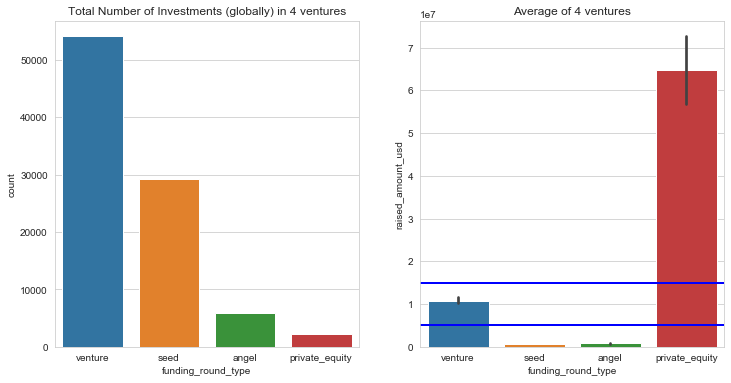

In [286]:
'''
Plot showing fraction of total investments (globally) in angel, venture, seed, and private equity, 
and the average amount of investment in each funding type
'''

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame_box)
plt.title("Total Number of Investments (globally) in 4 ventures")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_box, estimator=np.mean)
plt.title("Average of 4 ventures")
plt.axhline(y=5000000, linewidth=2, color = 'b')
plt.axhline(y=15000000, linewidth=2, color = 'b')
plt.show()

In [145]:
#Plot 2

In [152]:
#Top 9 countries against the total amount of investments

In [323]:
top9

,country_code,raised_amount_usd_sum
8,USA,422510842796.000000
1,CHN,39835418773.000000
4,GBR,20245627416.000000
5,IND,14391858718.000000
0,CAN,9583332317.000000
3,FRA,7259536732.000000
6,ISR,6907514579.000000
2,DEU,6346959822.000000
7,JPN,3363676611.000000


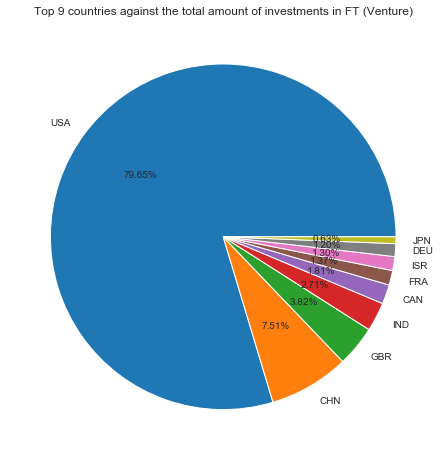

In [335]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(top9.raised_amount_usd_sum, labels = top9.country_code, autopct='%1.2f%%')
plt.title("Top 9 countries against the total amount of investments in FT (Venture)")
plt.show()

In [122]:
#Plot 3

In [289]:
d1_graph = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
d1_graph

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
6679,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.000000,/organization/170-systems,170 systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,Software,Others,1,14000000.000000
6735,/organization/6th-sense-analytics,/funding-round/cd61853ebd84ed7b88961476c709d839,venture,A,31-01-2007,5000000.000000,/organization/6th-sense-analytics,6th sense analytics,http://www.sixthsenseanalytics.com,Software,acquired,USA,NC,Raleigh,Morrisville,01-01-2004,Software,Others,1,5000000.000000
6750,/organization/above-all-software,/funding-round/022e0561bb09c8a0b620ac0b8d7009ff,venture,B,17-02-2004,11500000.000000,/organization/above-all-software,above all software,NA,Software,operating,USA,CA,SF Bay Area,Redwood City,01-01-2002,Software,Others,1,11500000.000000
6769,/organization/accreon,/funding-round/49d4a59f1c027e846ff013118f1c47db,venture,NA,08-04-2015,5500000.000000,/organization/accreon,accreon,http://www.accreon.com/,Software,operating,USA,MA,Boston,Boston,01-01-2008,Software,Others,1,5500000.000000
6780,/organization/achieve3000,/funding-round/f34839a52eb6e56e0a1f9cdd09248861,venture,NA,24-07-2007,9000000.000000,/organization/achieve3000,achieve3000,http://www.achieve3000.com,Software,operating,USA,NJ,Newark,Lakewood,01-01-2000,Software,Others,1,9000000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110960,/organization/keybase,/funding-round/18004f2e94ef51adb4189830a8f3c928,venture,A,15-07-2015,10800000.000000,/organization/keybase,keybase,https://keybase.io/,Web Tools,operating,USA,NY,New York City,New York,01-01-2014,Web Tools,Others,1,10800000.000000
110972,/organization/predictix,/funding-round/f2f8819cdd5689b858ff3943bd3db4c1,venture,A,03-12-2014,15000000.000000,/organization/predictix,predictix,http://www.predictix.com,Enterprise Resource Planning|Predictive Analyt...,operating,USA,GA,Atlanta,Atlanta,01-01-2005,Enterprise Resource Planning,Others,1,15000000.000000
111032,/organization/mercatus,/funding-round/e31aa9a63a2369857d83fa1a471f3dda,venture,NA,06-11-2015,6709401.000000,/organization/mercatus,mercatus,http://gomercatus.com,Energy IT|Hardware + Software,operating,USA,CA,SF Bay Area,San Jose,01-01-2009,Energy IT,Cleantech / Semiconductors,1,6709401.000000
111125,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.000000,/organization/thisnext,thisnext,http://www.thisnext.com,Social Buying|Social Media,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,Social Buying,"Social, Finance, Analytics, Advertising",1,5000000.000000


In [290]:
d2_graph = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d2_graph

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
7007,/organization/antenna-software,/funding-round/ff66f0352285651b74e60ade063c4af4,venture,NA,25-06-2010,6374457.000000,/organization/antenna-software,antenna software,http://www.antennasoftware.com,Software,acquired,GBR,N7,London,Guildford,01-01-1998,Software,Others,1,6374457.000000
7023,/organization/aomi,/funding-round/ddf503a408ed1025d1b1b6cffaed0956,venture,NA,18-03-2014,7576257.000000,/organization/aomi,aomi,http://activeops.com,Software,operating,GBR,K7,London,Reading,01-01-2005,Software,Others,1,7576257.000000
7277,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NA,16-06-2005,15000000.000000,/organization/azure-solutions,azure solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,NA,Software,Others,1,15000000.000000
7290,/organization/bacula-systems,/funding-round/f69100a9ec2687887b728525dcf446bf,venture,NA,09-06-2011,5000000.000000,/organization/bacula-systems,bacula systems,http://www.baculasystems.com,Software,operating,GBR,C5,NA,NA,NA,Software,Others,1,5000000.000000
7388,/organization/bizzby,/funding-round/6ef28bed27ef179032ac8456e0494a5f,venture,NA,31-03-2014,10000000.000000,/organization/bizzby,bizzby,http://bizzby.com,Software,operating,GBR,H9,London,London,01-01-2012,Software,Others,1,10000000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108261,/organization/state,/funding-round/fba0d73e808772419ab719980205392e,venture,NA,19-02-2013,14000000.000000,/organization/state,state,http://www.state.com,Open Source|Opinions|Social Media|Startups,operating,GBR,H9,London,London,01-01-2010,Open Source,Others,1,14000000.000000
108708,/organization/troux-technologies,/funding-round/3910ebe308f7b9464baee88257ae04b1,venture,E,19-11-2007,7850000.000000,/organization/troux-technologies,troux technologies,http://www.troux.com,Career Planning|Enterprise Software|Software,acquired,GBR,B9,London,Slough,01-01-2001,Career Planning,"Social, Finance, Analytics, Advertising",1,7850000.000000
108709,/organization/troux-technologies,/funding-round/468111d06495683fa9db48fae9a4e38e,venture,NA,08-10-2009,10000000.000000,/organization/troux-technologies,troux technologies,http://www.troux.com,Career Planning|Enterprise Software|Software,acquired,GBR,B9,London,Slough,01-01-2001,Career Planning,"Social, Finance, Analytics, Advertising",1,10000000.000000
110526,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,NA,21-05-2014,8425073.000000,/organization/e-leathergroup,e-leathergroup,http://www.eleathergroup.com/,Textiles,operating,GBR,K3,Peterborough,Peterborough,NA,Textiles,Others,1,8425073.000000


In [291]:
d3_graph = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
d3_graph

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_inv_count,total_inv_amount
975,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.000000,/organization/chillr-2,chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,Apps,"News, Search and Messaging",1,6000000.000000
1574,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.000000,/organization/jugnoo,jugnoo,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging",1,5000000.000000
2053,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.000000,/organization/peppertap,peppertap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging",1,10000000.000000
2671,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.000000,/organization/tinyowl-technology,tinyowl technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NA,Apps,"News, Search and Messaging",1,7665775.000000
2760,/organization/urbanclap,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.000000,/organization/urbanclap,urbanclap,https://www.urbanclap.com,Apps,operating,IND,7,Delhi,Delhi,01-10-2014,Apps,"News, Search and Messaging",1,10000000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103037,/organization/itzcash-card-ltd,/funding-round/554a79a8f4b381ad15d6fadc63905da8,venture,NA,12-10-2007,10000000.000000,/organization/itzcash-card-ltd,itzcash card ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,Gift Card,Others,1,10000000.000000
103038,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,C,02-09-2014,15000000.000000,/organization/itzcash-card-ltd,itzcash card ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,Gift Card,Others,1,15000000.000000
107594,/organization/connectm-technology-solutions,/funding-round/d6b855117c4da75810e0570b66004a06,venture,A,27-06-2007,6000000.000000,/organization/connectm-technology-solutions,connectm technology solutions,http://www.connectm.com,Intellectual Asset Management|M2M|Mobility|Sec...,operating,IND,19,Bangalore,Bangalore,01-01-2007,Intellectual Asset Management,Others,1,6000000.000000
108706,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NA,29-11-2006,15000000.000000,/organization/travelguru,travelguru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NA,Career Planning,"Social, Finance, Analytics, Advertising",1,15000000.000000


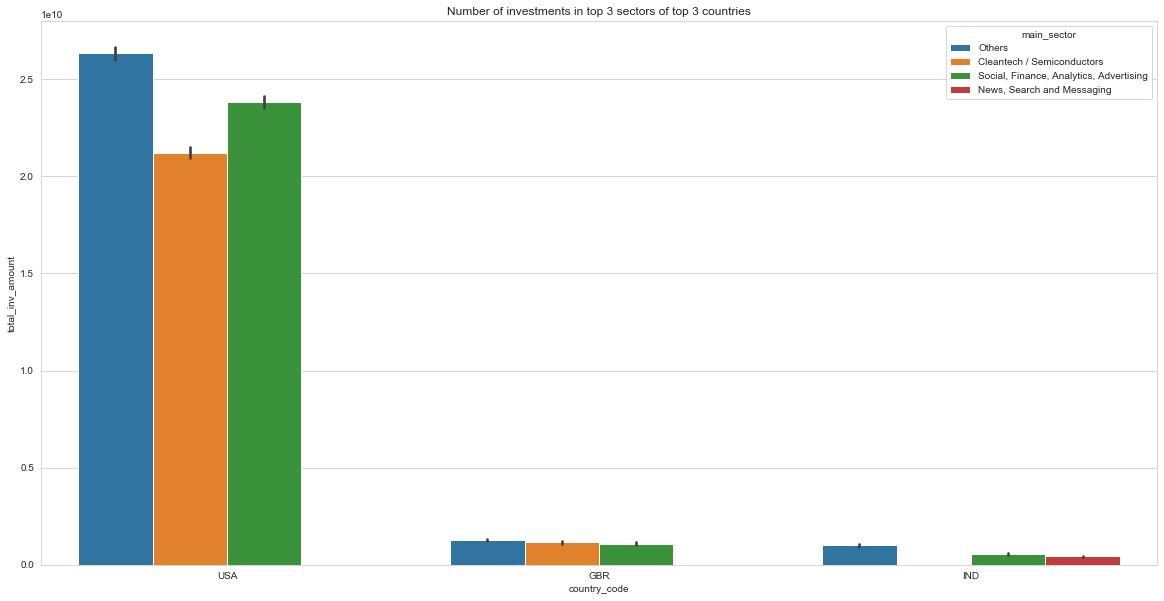

In [296]:
frames = [d1_graph, d2_graph, d3_graph]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
plt.title("Number of investments in top 3 sectors of top 3 countries")
sns.barplot(y='total_inv_amount', x='country_code', hue="main_sector", data=result, estimator=np.sum)
plt.show()